### 1 실습목표
1. pandas, matplotlib 사용하기
2. 서울시 각 구별 CCTV 현황 살펴보기 ,인구대비 CCTV비율이 높은/낮은 지역 알아보기
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### csv 파일 읽기 -서울시 구별 CCTV 현황

In [4]:
CCTV_Seoul=pd.read_csv('CCTV_in_Seoul.csv')
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [8]:
# 컬럼 이름 바꾸기
CCTV_Seoul.rename(columns={'기관명':'구'},inplace=True)

In [9]:
CCTV_Seoul

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


### 엑셀파일 읽기 -서울시 인구현황

In [18]:
pop_Seoul=pd.read_excel('population_in_Seoul.xls')
pop_Seoul.head(2)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자


In [48]:
# 읽어오고 싶은 행,열 선택하여 불러오기
# header : 읽고 싶은 row index(0부터 시작)
# usecols :읽고 싶은 columns 선택
pop_Seoul=pd.read_excel('population_in_Seoul.xls',header=2,usecols='B,D,G,J,N')
pop_Seoul.head(2)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [49]:
# 컬럼명 수정
pop_Seoul.columns=['구','인구수','한국인수','외국인수','65세이상고령자수']

In [50]:
pop_Seoul.head()

,구,인구수,한국인수,외국인수,65세이상고령자수
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


##### 결측치 확인

In [28]:
# 간략한 정보 -컬럼 수,데이터 수,컬럼별 데이터 타입 등 
# 결측치 여부 확인 가능
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구          25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [51]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구          26 non-null     object 
 1   인구수        26 non-null     float64
 2   한국인수       26 non-null     float64
 3   외국인수       26 non-null     float64
 4   65세이상고령자수  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [30]:
# 결측치 데이터 가져오기 - 조건 필터링 (불리언 인덱싱)
# 1. '구' 컬럼 가져오기 컬럼인덱싱
# 2. '구' 컬럼 데이터의 결측치 판단 (,isnull()) ->값이 불리언으로 출력
# 3. 2를통해 결측치 데이터만 가져오기 ->불리언 인덱싱

In [52]:
pop_Seoul['구']

0       합계
1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구, dtype: object

In [53]:
pop_Seoul['구'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구, dtype: bool

In [54]:
pop_Seoul[pop_Seoul['구'].isnull()]

,구,인구수,한국인수,외국인수,65세이상고령자수
26,NaN,NaN,NaN,NaN,NaN


In [55]:
# 결측치 삭제
pop_Seoul.drop(26,inplace=True)

In [56]:
# pop_Seoul.drop('',axis=1,)

##### CCTV 수가 많은/적은 지역을 파악해보자 (5개씩)

In [61]:
CCTV_Seoul.sort_values(by='소계',ascending=False).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


##### CCTV가 적은 지역 5개

In [63]:
CCTV_Seoul.sort_values(by='소계').head()

,구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


##### 데이터 병합

In [64]:
pop_Seoul

,구,인구수,한국인수,외국인수,65세이상고령자수
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [67]:
CCTV_구=set(CCTV_Seoul['구'].unique())

In [69]:
pop_구=set(pop_Seoul['구'].unique())

In [70]:
CCTV_구-pop_구

set()

In [71]:
pop_구-CCTV_구

{'합계'}

In [73]:
data_result=pd.merge(CCTV_Seoul,pop_Seoul,on='구')

In [74]:
data_result

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0


##### 인구수대비 cctv 비율이 높은/낮은 지역 파악해보기!
- 특성공학 : 컬럼끼리 연산을 통해 의미있는 컬럼을 만드는 작업

In [78]:
(data_result['소계']/data_result['인구수'])*100

0     0.487292
1     0.170552
2     0.226535
3     0.146413
4     0.284673
5     0.189970
6     0.348536
7     0.397911
8     0.222170
9     0.139110
10    0.350207
11    0.264472
12    0.147312
13    0.294043
14    0.428594
15    0.341211
16    0.317391
17    0.092587
18    0.423769
19    0.224326
20    0.665020
21    0.378852
22    0.615404
23    0.503603
24    0.159227
dtype: float64

In [79]:
# 새 컬럼 생성 - 인구대비 CCTV비율

In [80]:
data_result['인구대비 CCTV비율']=(data_result['소계']/data_result['인구수'])*100

In [82]:
data_result

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.170552
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,0.226535
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.146413
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,0.284673
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0,0.189970
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,0.348536
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,0.397911
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.222170
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.139110


In [84]:
data_result.sort_values(by='인구대비 CCTV비율',ascending=False).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV비율
20,용산구,1624,1368,218,112,398,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,450310.0,445994.0,4316.0,51733.0,0.428594


In [85]:
data_result.sort_values(by='인구대비 CCTV비율').head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV비율
17,송파구,618,529,21,68,463,667483.0,660584.0,6899.0,72506.0,0.092587
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.139110
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,0.146413
12,마포구,574,314,118,169,379,389649.0,378566.0,11083.0,48765.0,0.147312
24,중랑구,660,509,121,177,109,414503.0,409882.0,4621.0,56774.0,0.159227


##### 그래프 그리기

In [86]:
per_sort=data_result.sort_values(by='인구대비 CCTV비율',ascending=False)
per_sort

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자수,인구대비 CCTV비율
20,용산구,1624,1368,218,112,398,244203.0,229456.0,14747.0,36231.0,0.665020
22,종로구,1002,464,314,211,630,162820.0,153589.0,9231.0,25425.0,0.615404
23,중구,671,413,190,72,348,133240.0,124312.0,8928.0,20764.0,0.503603
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
14,서초구,1930,1406,157,336,398,450310.0,445994.0,4316.0,51733.0,0.428594
18,양천구,2034,1843,142,30,467,479978.0,475949.0,4029.0,52975.0,0.423769
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,0.397911
21,은평구,1873,1138,224,278,468,494388.0,489943.0,4445.0,72334.0,0.378852
10,동대문구,1294,1070,23,198,579,369496.0,354079.0,15417.0,54173.0,0.350207
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,0.348536


In [90]:
from matplotlib import rc
rc('font',family='Malgun Gothic')

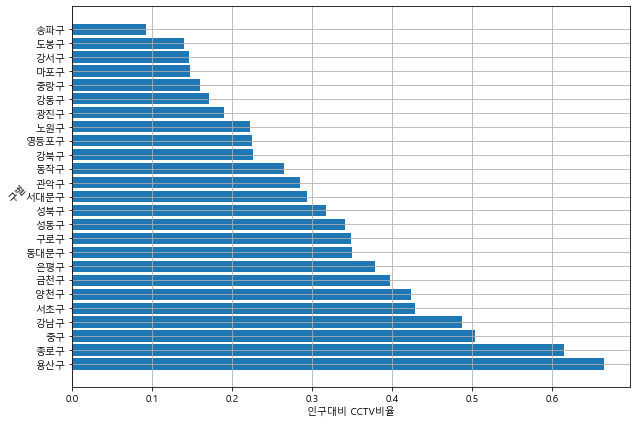

In [105]:
plt.figure(figsize=(10,7)) # 가로세로
plt.barh(per_sort['구'],per_sort['인구대비 CCTV비율'])
plt.xlabel('인구대비 CCTV비율')
plt.ylabel('구별' ,rotation=45)
plt.grid() # 기본 격자 설정
plt.show()